<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 
    Andrés Ramírez Villanueva, Santiago Romero Riggen

**Fecha:** 26 de junio del 2021.

**Expediente** : IF726061, if715099
    
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/andres1999iteso/Tarea7_SRomero_ARam-rez

# Tarea 7: Clase 13

# Problema

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:
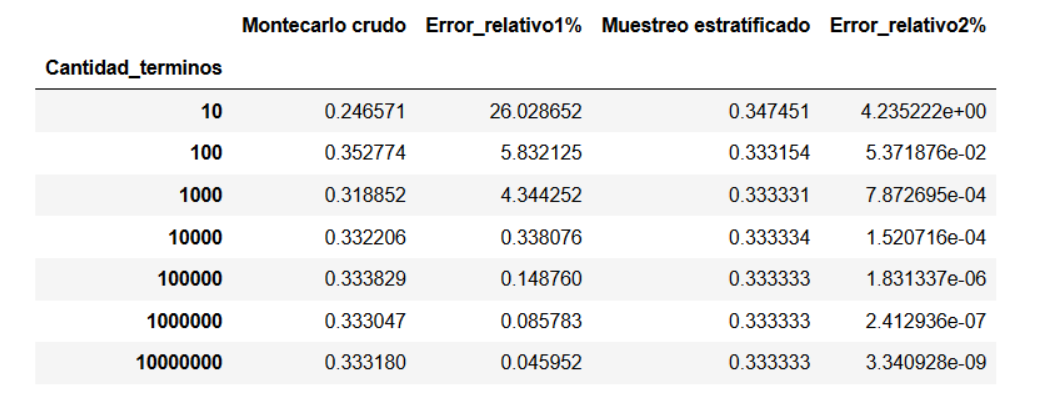

Estudiante 1: Santiago Romero Riggen

In [1]:
import numpy as np
from functools import reduce
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# definimos func mcarlo
def mcarlo(f:'Funcion',
          a:'límite inferior',
          b:'límite superior',
          u:'Muestra'):
    return(b-a) / len(u) * np.sum(f(u))

# definimos func estratificado
def estratificado(B: 'Cantidad estratos'):
    u2 = np.random.rand(B)
    i = np.arange(0,B)
    v = (u2 + i) / B
    return v

In [12]:
# intervalo
a = 0; b = 1

# Cantidad de términos
# escala logarítmica
N = np.logspace(1,7,7,dtype=int)

# tabla de resultados
B=N
tabla = pd.DataFrame(index=N,columns=['Montecarlo Crudo',
                                      'Error_relativo1%',
                                      'Muestreo estratificado',
                                      'Error_relativo2%'], dtype='float')
tabla.index.name = "Cantidad_terminos"

# Números aleatorios por cantidad de términos N
ui = list(map(lambda N: np.random.uniform(a,b,N),N))
ui_est = list(map(lambda B: estratificado(B),B))

# Aproximación por montecarlo con la cantidad de términos de ui
I_m = list(map(lambda Y:mcarlo(lambda x:x**2,a,b,Y),ui))

# Aproximación por el metodo de muestreo estratificado con cantidad de terminos creados con ui_est
I_est = list(map(lambda Y: mcarlo(lambda x:x**2,a,b,Y),ui_est))

In [13]:
# Mostramos los resultados en la tabla previamente creada
# Montecarlo crudo
tabla.loc[N,"Montecarlo Crudo"] = I_m
# Error relativo 1%
tabla.loc[N,"Error_relativo1%"] = np.abs(tabla.loc[N,"Montecarlo Crudo"]-I)*100/I
# Muestreo estratificado
tabla.loc[N,"Muestreo estratificado"] = I_est
# Error relativo 2%
tabla.loc[N,"Error_relativo2%"] = np.abs(tabla.loc[N,"Muestreo estratificado"]-I)*100/I
tabla

,Montecarlo Crudo,Error_relativo1%,Muestreo estratificado,Error_relativo2%
Cantidad_terminos,,,,
10,0.322229,3.331362,0.346253,3.875893e+00
100,0.317030,4.891054,0.332935,1.196436e-01
1000,0.346052,3.815597,0.333330,8.529193e-04
10000,0.332644,0.206862,0.333334,1.244812e-04
100000,0.333559,0.067804,0.333333,1.653315e-06
1000000,0.333248,0.025476,0.333333,2.109335e-07
10000000,0.333322,0.003450,0.333333,2.129863e-09


Estudiante 2 Andrés Ramírez Villanueva

In [50]:
#Importar librerías

import numpy as np
import pandas as pd

1° Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.

In [14]:
def mues_estra(N: 'Número de estratos'):
    i = np.arange(0, N)
    U2 = np.random.uniform(0, 1, N)    
    int_est = (U2 + i) / N
    i_m = integral(lambda x: x**2, a, b, int_est)
    return i_m

2 ° Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la imagen.

In [15]:
#Función para integral
def integral(f:'Función', a:'límite inf', b:'límite superior', U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

#Valores a considerar
a = 0
b = 1
i = 1/3
n = np.logspace(1, 7, 7, dtype = int)

mc = list(map(lambda n: np.random.uniform(a, b, n), n))
m = list(map(lambda Y: integral(lambda x: x**2, a, b, Y), mc))

data = pd.DataFrame(index=n,data = {'Montecarlo Crudo': m})
data['Error_relativo1%'] = (np.abs(data.iloc[:,0] - i)*100) / i

estra = [mues_estra(n[i]) for i in range(len(n))]

data['Muestreo estratíficado'] = estra
data['Error_relativo2%'] = (np.abs(data.iloc[:,2] - i)*100) / i
data.index.name="Cantidad_terminos"
data

,Montecarlo Crudo,Error_relativo1%,Muestreo estratíficado,Error_relativo2%
Cantidad_terminos,,,,
10,0.362595,8.778594,0.336747,1.024018e+00
100,0.407615,22.284362,0.333298,1.072702e-02
1000,0.332655,0.203386,0.333334,8.358059e-05
10000,0.329669,1.099201,0.333333,7.569892e-05
100000,0.334621,0.386152,0.333333,8.570390e-07
1000000,0.333401,0.020283,0.333333,8.376263e-08
10000000,0.333322,0.003305,0.333333,4.096340e-09
